# EDA Questions
- Number of movies?
- Summary stats of ratings (average, median, quartiles)
- Boxplot of number of ratings given by each user

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
dataset_tables = {}

for file in os.listdir("./original-dataset"):
    df = pd.read_csv(f"./original-dataset/{file}")
    fileName = file[:-4]
    dataset_tables[fileName] = df

In [3]:
ratings_df = dataset_tables["ratings"]

In [4]:
ratings_df_length = len(ratings_df.index)

## Average number of ratings per user

In [5]:
user_num_ratings = {}

for i, row in ratings_df.iterrows():
    user_id = row["userId"]
    rating = row["rating"]

    if user_id in user_num_ratings:
        user_num_ratings[user_id] += 1
    else:
        user_num_ratings[user_id] = 0

    print("{0} / {1}".format(i, ratings_df_length), end = "\r")

In [6]:
user_num_ratings_list = np.array(list(user_num_ratings.values()))
print("Average:", np.mean(user_num_ratings_list))
print("Median:",  np.median(user_num_ratings_list))

Average: 143.4135299257002
Median: 67.0


<AxesSubplot:>

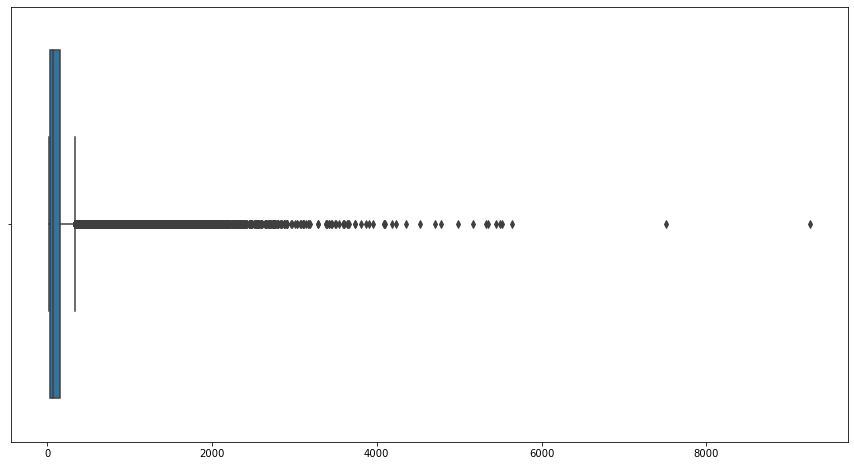

In [7]:
plt.figure(figsize=(15,8))
sns.boxplot(x=user_num_ratings_list)

## Average Number of Ratings Per Movie

In [8]:
num_ratings_by_movie = {}

for i, row in ratings_df.iterrows():
    movie_id = row["movieId"]
    rating = row["rating"]

    if movie_id in num_ratings_by_movie:
        num_ratings_by_movie[movie_id] += 1
    else:
        num_ratings_by_movie[movie_id] = 0

    print("{0} / {1}".format(i, ratings_df_length), end = "\r")

In [13]:
num_movie_ratings_per_movie = np.array(list(num_ratings_by_movie.values()))
print("Average:", np.mean(num_movie_ratings_per_movie))
print("Median:",  np.median(num_movie_ratings_per_movie))
print("Q2:",  np.quantile(num_movie_ratings_per_movie, 0.25))
print("Q3:",  np.quantile(num_movie_ratings_per_movie, 0.75))
print("99th Percentile:",  np.quantile(num_movie_ratings_per_movie, 0.99))

Average: 746.8411232425965
Median: 17.0
Q2: 2.0
Q3: 204.0
99th Percentile: 14387.689999999995


<AxesSubplot:>

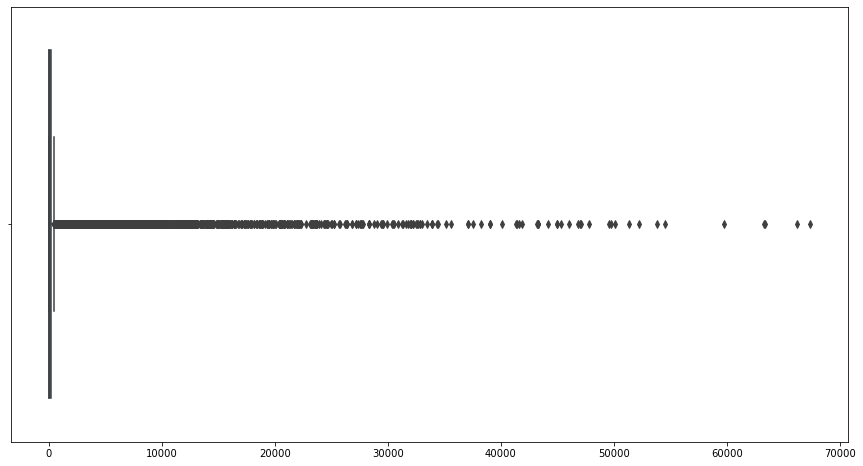

In [10]:
plt.figure(figsize=(15,8))
sns.boxplot(x=num_movie_ratings_per_movie)

<AxesSubplot:ylabel='Count'>

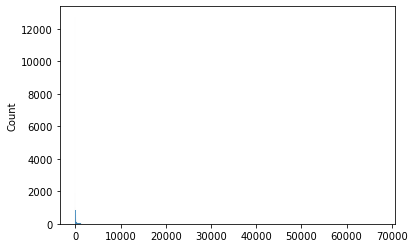

In [12]:
plt.figure(figsize=(15,8))
sns.histplot(x=num_movie_ratings_per_movie)

## Average Rating Per User

In [6]:
user_ratings_sum = {}

for i, row in ratings_df.iterrows():
    user_id = row["userId"]
    rating = row["rating"]

    if user_id in user_ratings_sum:
        user_ratings_sum[user_id][0] += rating
    else:
        user_ratings_sum[user_id] = [rating, 0]

    user_ratings_sum[user_id][1] += 1

    print("{0} / {1}".format(i, ratings_df_length), end = "\r")

NameError: name 'np' is not defined

In [9]:
user_ratings_avg = np.array([], dtype="float")
user_ratings_sum_length = len(user_ratings_sum)

for i, user_id in enumerate(user_ratings_sum):
    rating_sum, num_ratings = user_ratings_sum[user_id]
    rating_avg = rating_sum / num_ratings
    user_ratings_avg = np.append(user_ratings_avg, [rating_avg])
    print("{0} / {1}".format(i, user_ratings_sum_length), end = "\r")

In [10]:
user_ratings_avg

array([3.74285714, 4.        , 4.12299465, ..., 2.68181818, 4.09756098,
       4.17292225])

<AxesSubplot:>

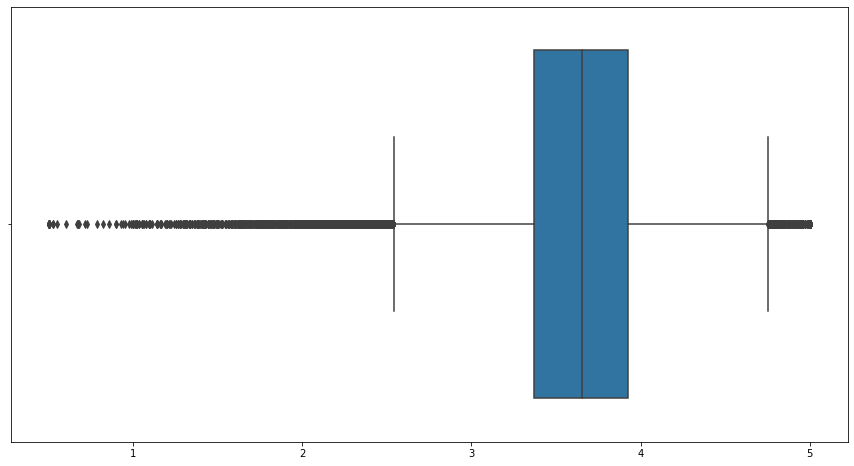

In [18]:
plt.figure(figsize=(15,8))
sns.boxplot(x=user_ratings_avg)